In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DF=pd.read_csv("E:\Project\StudentsPerformance.csv")
DF.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
DF.shape

(1000, 8)

In [4]:
DF.rename(columns={"gender":"Gender"},inplace=True)
DF.rename(columns={"race/ethnicity":"Ethnicity"},inplace=True)
DF.rename(columns={"parental level of education":"Parents_Qualification"},inplace=True)
DF.rename(columns={"lunch":"Lunch"},inplace=True)
DF.rename(columns={"test preparation course":"Course"},inplace=True)
DF.rename(columns={"math score":"Maths"},inplace=True)
DF.rename(columns={"reading score":"Reading"},inplace=True)
DF.rename(columns={"writing score":"Writing"},inplace=True)
#DF.rename(coloums={"gender":"Gender"},inplace=True)


In [5]:
DF.head()

,Gender,Ethnicity,Parents_Qualification,Lunch,Course,Maths,Reading,Writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
#Adding the average marks for better analysis
average=DF.mean(numeric_only=True,axis=1)
DF['Average']=average
DF


,Gender,Ethnicity,Parents_Qualification,Lunch,Course,Maths,Reading,Writing,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [7]:
#adding the grades for better abalysis
conditions,type_choices=(
   [    (DF["Average"] > 91),
        (DF["Average"] > 81),
        (DF["Average"] > 71),
        (DF["Average"] > 61),
        (DF["Average"] > 51),
        (DF["Average"] > 41),
        (DF["Average"] > 31),
        (DF["Average"] <= 30),]
    ,["A1", "A2", "B1", "B2", "C1", "C2", "D", "Fail"]
)

DF["Grade"] = np.select(conditions, type_choices, default="Fail")





In [8]:
DF.head()

,Gender,Ethnicity,Parents_Qualification,Lunch,Course,Maths,Reading,Writing,Average,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B1
1,female,group C,some college,standard,completed,69,90,88,82.333333,A2
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,C2
4,male,group C,some college,standard,none,76,78,75,76.333333,B1


F:\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F

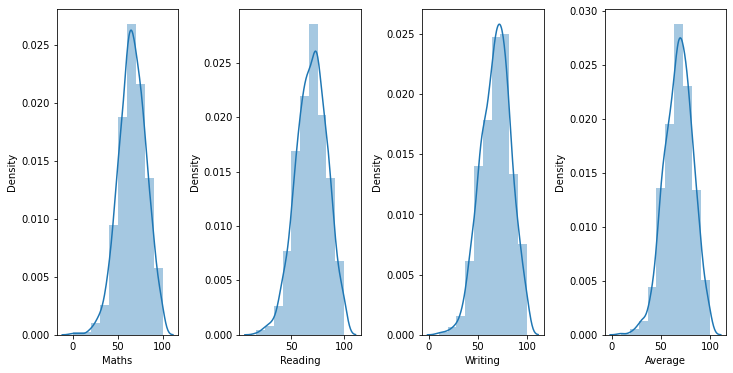

In [9]:
#density plots of Average and the Grades
plt.figure(figsize=(12,6))
n=0
for x in ['Maths','Reading','Writing','Average']:
    n+=1
    plt.subplot(1,4, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(DF[x] , bins=10)
    
plt.show()    


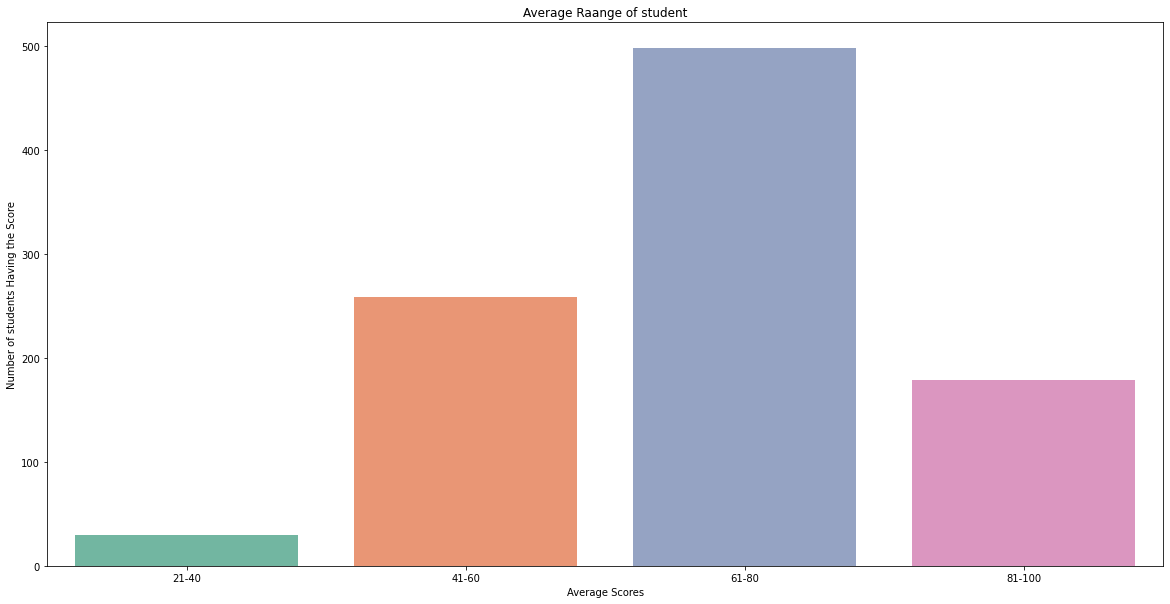

In [10]:
plt.figure(figsize=(20,10))
av1 =  DF['Average'][(DF['Average'] >= 21) & (DF["Average"] <= 40)]
av2 =  DF['Average'][(DF['Average'] >= 41) & (DF["Average"] <= 60)]
av3 =  DF['Average'][(DF['Average'] >= 61) & (DF["Average"] <= 80)]
av4 =  DF['Average'][(DF['Average'] >= 81) & (DF["Average"] <= 100)]
ssx = ["21-40", "41-60", "61-80", "81-100"]
ssy = [len(av1.values), len(av2.values), len(av3.values), len(av4.values)]
plt.title ("Average Raange of student")
sns.barplot(x=ssx, y=ssy, palette="Set2")

plt.xlabel("Average Scores")
plt.ylabel("Number of students Having the Score")
plt.show()





In [11]:
race_count=DF.Ethnicity.value_counts()
race_count.head()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Ethnicity, dtype: int64

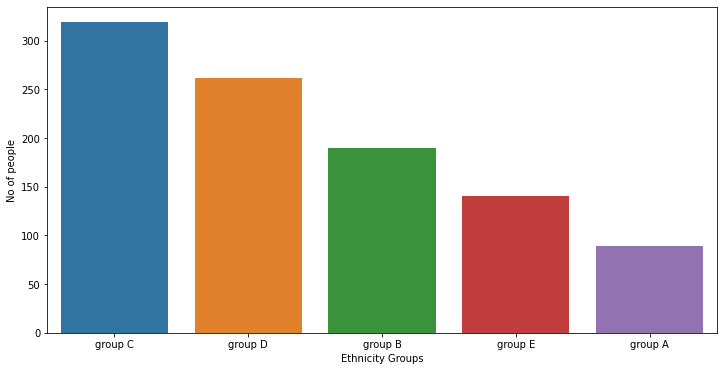

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x=race_count.index,y=race_count)

plt.xlabel("Ethnicity Groups")
plt.ylabel("No of people")
plt.show()

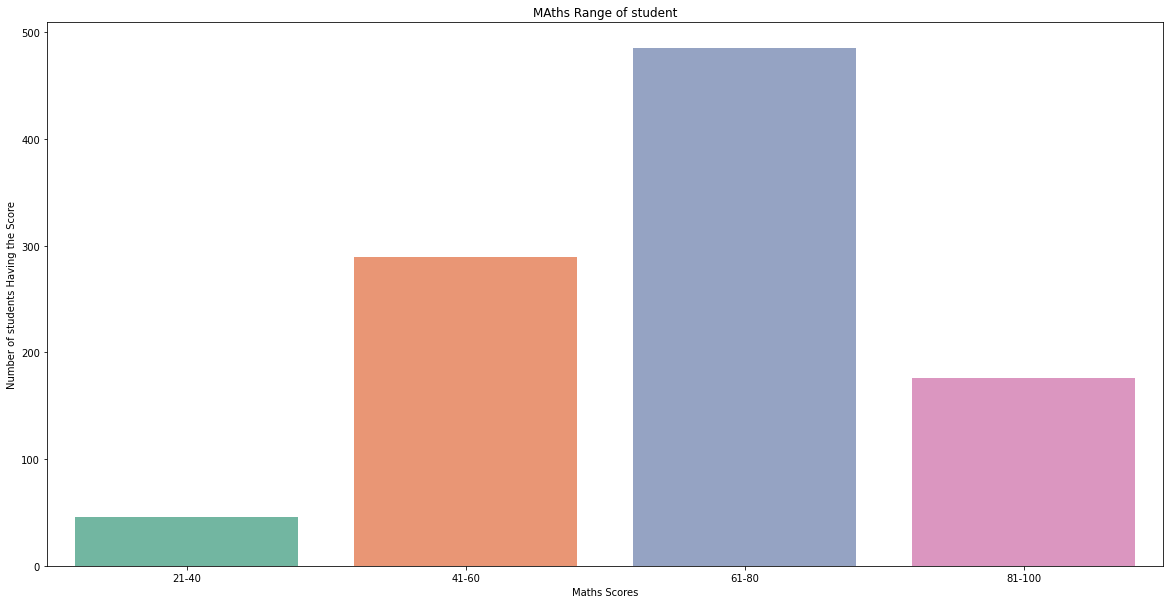

In [13]:
plt.figure(figsize=(20,10))
M1 =  DF['Maths'][(DF['Maths'] >= 21) & (DF['Maths'] <= 40)]
M2 =  DF['Maths'][(DF['Maths'] >= 41) & (DF['Maths'] <= 60)]
M3 =  DF['Maths'][(DF['Maths'] >= 61) & (DF['Maths'] <= 80)]
M4 =  DF['Maths'][(DF['Maths'] >= 81) & (DF['Maths'] <= 100)]


ssx = ["21-40", "41-60", "61-80", "81-100"]
ssy = [len(M1.values), len(M2.values), len(M3.values), len(M4.values)]
plt.title ("MAths Range of student")
sns.barplot(x=ssx, y=ssy, palette="Set2")

plt.xlabel("Maths Scores")
plt.ylabel("Number of students Having the Score")
plt.show()

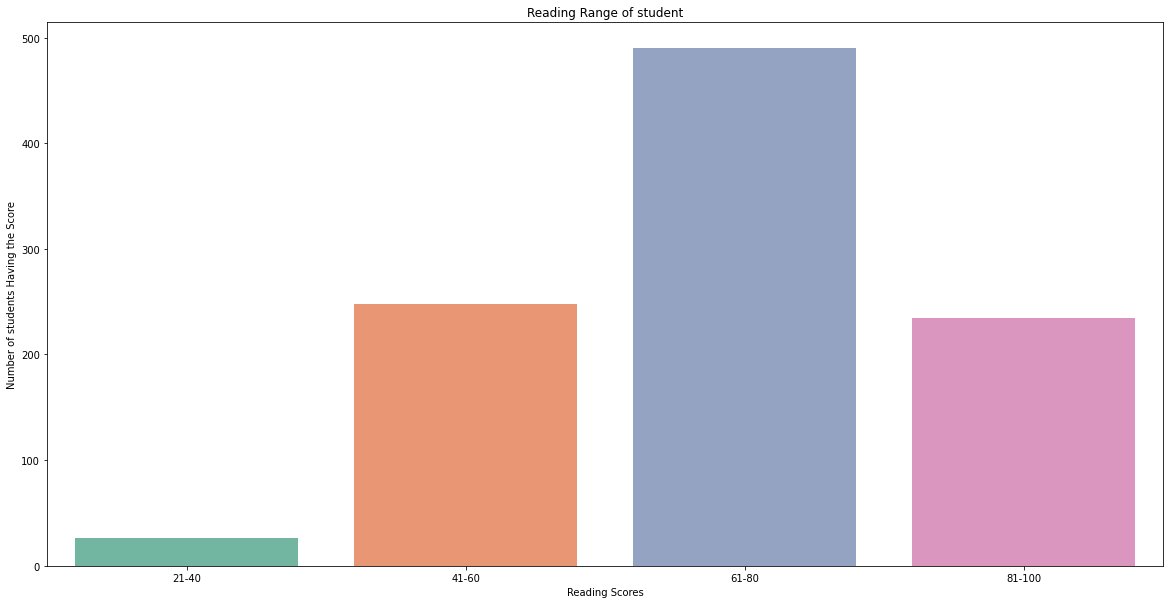

In [14]:
plt.figure(figsize=(20,10))
r1 =  DF['Reading'][(DF['Reading'] >= 21) & (DF['Reading'] <= 40)]
r2 =  DF['Reading'][(DF['Reading'] >= 41) & (DF['Reading'] <= 60)]
r3 =  DF['Reading'][(DF['Reading'] >= 61) & (DF['Reading'] <= 80)]
r4 =  DF['Reading'][(DF['Reading'] >= 81) & (DF['Reading'] <= 100)]


ssx = ["21-40", "41-60", "61-80", "81-100"]
ssy = [len(r1.values), len(r2.values), len(r3.values), len(r4.values)]
plt.title ("Reading Range of student")
sns.barplot(x=ssx, y=ssy, palette="Set2")

plt.xlabel("Reading Scores")
plt.ylabel("Number of students Having the Score")
plt.show()

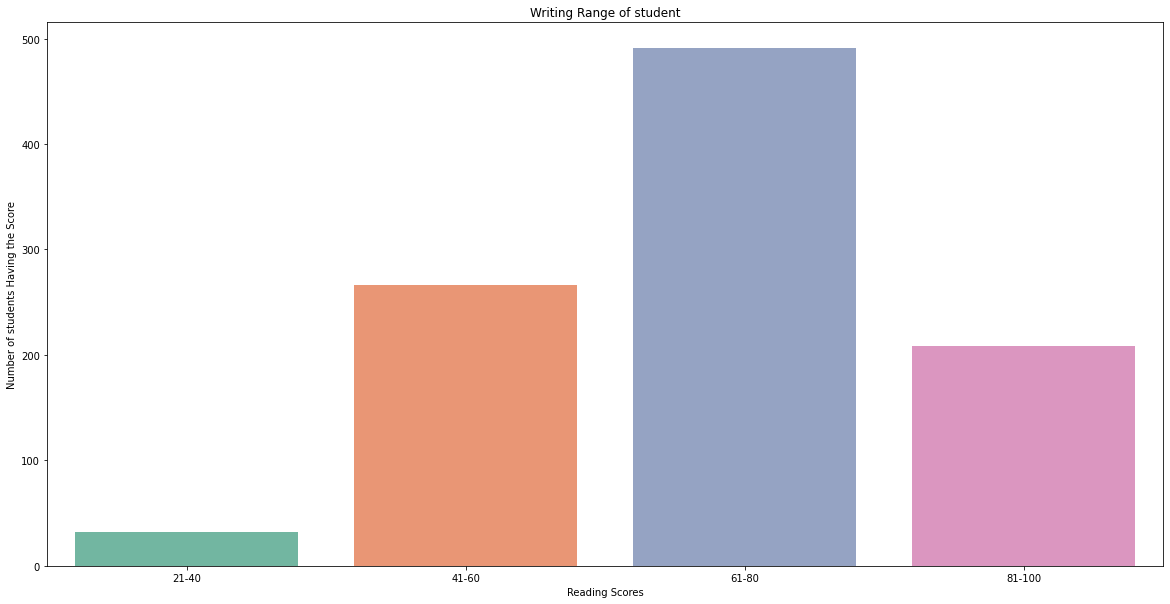

In [15]:
plt.figure(figsize=(20,10))
w1 =  DF['Writing'][(DF['Writing'] >= 21) & (DF['Writing'] <= 40)]
w2 =  DF['Writing'][(DF['Writing'] >= 41) & (DF['Writing'] <= 60)]
w3 =  DF['Writing'][(DF['Writing'] >= 61) & (DF['Writing'] <= 80)]
w4 =  DF['Writing'][(DF['Writing'] >= 81) & (DF['Writing'] <= 100)]


ssx = ["21-40", "41-60", "61-80", "81-100"]
ssy = [len(w1.values), len(w2.values), len(w3.values), len(w4.values)]
plt.title ("Writing Range of student")
sns.barplot(x=ssx, y=ssy, palette="Set2")

plt.xlabel("Reading Scores")
plt.ylabel("Number of students Having the Score")
plt.show()

In [16]:
DF.Gender.value_counts()

female    518
male      482
Name: Gender, dtype: int64

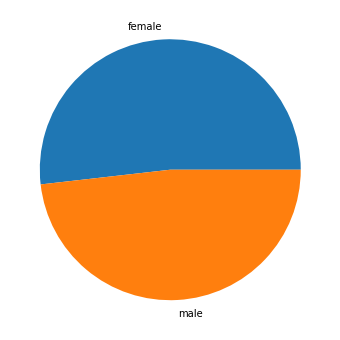

In [17]:
plt.figure(figsize=(12,6))
plt.pie(DF.Gender.value_counts(),labels=DF.Gender.value_counts().index)
plt.show()

In [18]:
DF.Parents_Qualification.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parents_Qualification, dtype: int64

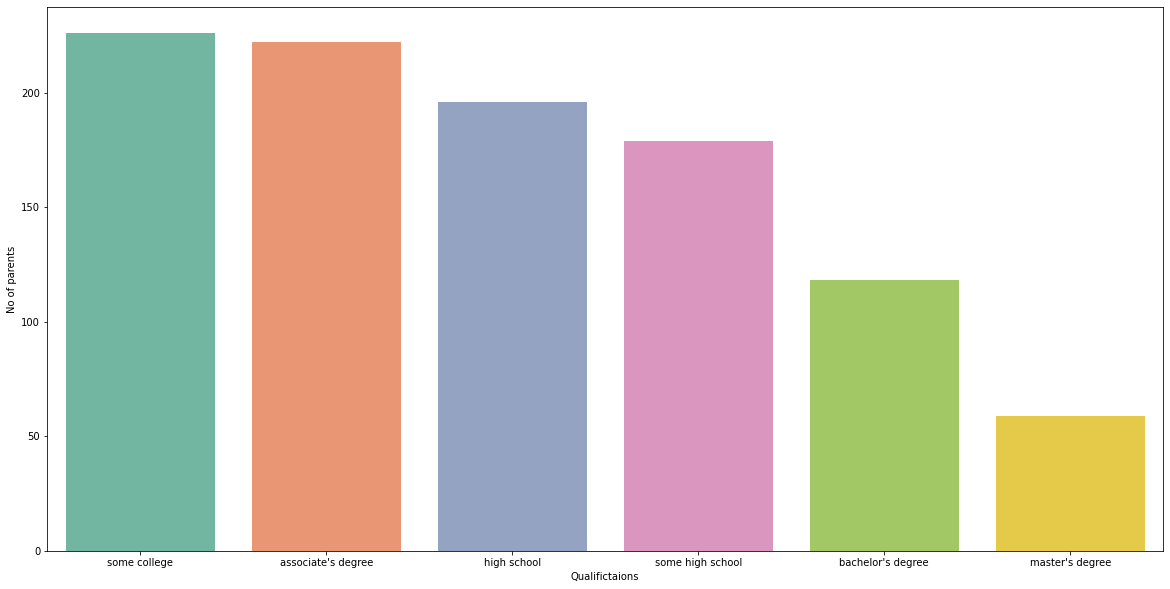

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x=DF.Parents_Qualification.value_counts().index,y=DF.Parents_Qualification.value_counts(),palette='Set2')
plt.xlabel('Qualifictaions')
plt.ylabel('No of parents')
plt.show()

In [20]:
DF.Grade.value_counts()

B2      263
B1      246
C1      189
A2      132
C2       89
A1       45
D        24
Fail     12
Name: Grade, dtype: int64

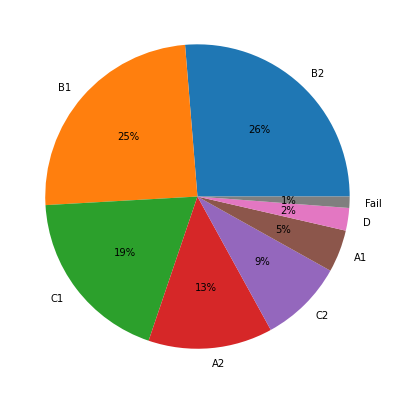

In [21]:
plt.figure(figsize=(14,7))
plt.pie(DF.Grade.value_counts(),labels=DF.Grade.value_counts().index,autopct='%1.0f%%')
plt.show()


In [22]:
DF.Course.value_counts()

none         642
completed    358
Name: Course, dtype: int64

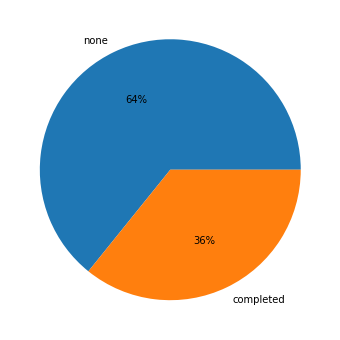

In [23]:
plt.figure(figsize=(12,6))
plt.pie(DF.Course.value_counts(),labels=DF.Course.value_counts().index,autopct="%1.0f%%")
plt.show()

In [24]:
Marks_dist1=DF[DF.Ethnicity=='group A']
Marks_dist1.head(10)

,Gender,Ethnicity,Parents_Qualification,Lunch,Course,Maths,Reading,Writing,Average,Grade
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,C2
13,male,group A,some college,standard,completed,78,72,70,73.333333,B1
14,female,group A,master's degree,standard,none,50,53,58,53.666667,C1
25,male,group A,master's degree,free/reduced,none,73,74,72,73.000000,B1
46,female,group A,associate's degree,standard,completed,55,65,62,60.666667,C1
61,male,group A,some high school,free/reduced,none,39,39,34,37.333333,D
62,male,group A,associate's degree,free/reduced,none,62,61,55,59.333333,C1
72,female,group A,associate's degree,free/reduced,none,41,51,48,46.666667,C2
77,male,group A,bachelor's degree,standard,completed,80,78,81,79.666667,B1
82,male,group A,some college,free/reduced,completed,50,47,54,50.333333,C2


In [27]:
group_a_avg=Marks_dist1['Average'].mean()

group_a_avg


62.992509363295895

In [28]:
Marks_dist2=DF[DF.Ethnicity=='group B']
group_b_avg=Marks_dist2['Average'].mean()
group_b_avg

65.46842105263158

In [29]:
Marks_dist3=DF[DF.Ethnicity=='group C']
group_c_avg=Marks_dist3['Average'].mean()
group_c_avg

67.13166144200628

In [30]:
Marks_dist4=DF[DF.Ethnicity=='group D']
group_d_avg=Marks_dist4['Average'].mean()
group_d_avg

69.1793893129771

In [31]:
Marks_dist5=DF[DF.Ethnicity=='group E']
group_e_avg=Marks_dist5['Average'].mean()
group_e_avg

72.75238095238095

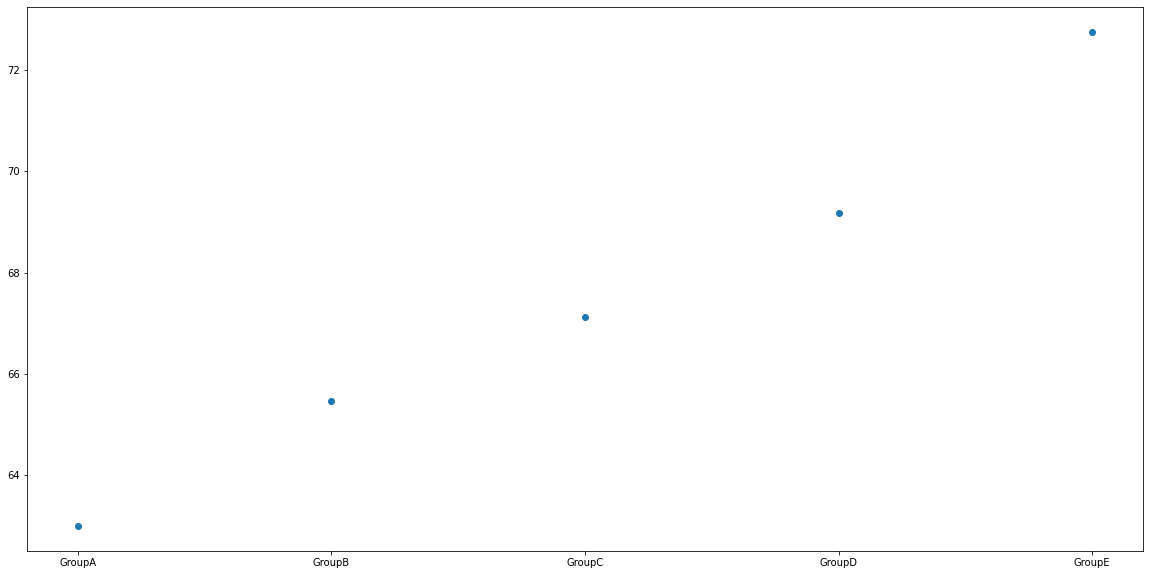

In [32]:
plt.figure(figsize=(20,10))
x=['GroupA','GroupB','GroupC','GroupD','GroupE']
y=[group_a_avg, group_b_avg, group_c_avg, group_d_avg, group_e_avg]
plt.scatter(x,y)
plt.show()